In [1]:
import pandas as pd

In [2]:
import os
os.listdir()

['Activities_1.ipynb',
 'Day9-Pandas2.ipynb',
 'README.md',
 'Day6.ipynb',
 'Day4.ipynb',
 'Activities_1.py',
 '.ipynb_checkpoints',
 '.git',
 'Day5.ipynb',
 'Day7.ipynb',
 'Day8-Pandas1.ipynb']

In [10]:
fb_df=pd.read_csv("../Desktop/fb_google_finance.csv")
fb_df.head()

,Date,Close
0,2/12/19,165.04
1,2/13/19,164.07
2,2/14/19,163.95
3,2/15/19,162.50
4,2/19/19,162.29


In [11]:
## days to look back
fb_df_daily_return = fb_df["Close"].pct_change(1)

0          NaN
1    -0.005877
2    -0.000731
3    -0.008844
4    -0.001292
        ...   
58   -0.021199
59   -0.001212
60   -0.004696
61   -0.001643
62   -0.036105
Name: Close, Length: 63, dtype: float64

In [12]:
painting_df = pd.DataFrame(
    [
        {"Painting": "Mona Lisa (Knockoff)", "Price": 25, "Popularity": "Very Popular"},
        {"Painting": "Van Gogh (Knockoff)", "Price": 20, "Popularity": "Popular"},
        {"Painting": "Starving Artist", "Price": 10, "Popularity": "Average"},
        {"Painting": "Toddler Drawing", "Price": 1, "Popularity": "Not Popular"},
    ]
)

In [16]:
painting_df.sort_values("Price",ascending=False)

,Painting,Price,Popularity
0,Mona Lisa (Knockoff),25,Very Popular
1,Van Gogh (Knockoff),20,Popular
2,Starving Artist,10,Average
3,Toddler Drawing,1,Not Popular


In [17]:
painting_df.set_index("Popularity")

,Painting,Price
Popularity,,
Very Popular,Mona Lisa (Knockoff),25
Popular,Van Gogh (Knockoff),20
Average,Starving Artist,10
Not Popular,Toddler Drawing,1


In [19]:
tesla_df=pd.read_csv("../Desktop/tsla_google_finance.csv")
tesla_df.head()

,Date,Close
0,11/13/18,338.73
1,11/14/18,344.00
2,11/15/18,348.44
3,11/16/18,354.31
4,11/19/18,353.47


In [20]:
tesla_df.set_index("Date")

,Close
Date,
11/13/18,338.73
11/14/18,344.00
11/15/18,348.44
11/16/18,354.31
11/19/18,353.47
...,...
5/8/19,244.84
5/9/19,241.98
5/10/19,239.52


In [21]:
tesla_df.sample(5)

,Date,Close
48,1/25/19,297.04
39,1/11/19,347.26
67,2/22/19,294.71
87,3/22/19,264.53
73,3/4/19,285.36


In [22]:
tesla_df.sort_values("Close",ascending=False)

,Date,Close
20,12/13/18,376.79
18,12/11/18,366.76
19,12/12/18,366.60
21,12/14/18,365.71
17,12/10/18,365.15
...,...,...
113,4/30/19,238.69
111,4/26/19,235.14
114,5/1/19,234.01
123,5/14/19,232.31


In [24]:
##Calculate daily returns.
tesla_df.isnull().any()

Date     False
Close    False
dtype: bool

In [35]:
#daily return and asigning to another column
tesla_df["daily_return"] = tesla_df["Close"].pct_change(1)

In [36]:
tesla_df.sort_values("daily_return",ascending=False)
tesla_df

,Date,Close,daily_return
28,12/26/18,326.09,NaN
8,11/26/18,346.00,0.061057
34,1/4/19,317.69,-0.081821
70,2/27/19,314.74,-0.009286
30,12/28/18,333.87,0.060780


In [37]:
#slice out of 5
tesla_df= tesla_df.sort_values("daily_return",ascending=False).iloc[:5]
tesla_df

,Date,Close,daily_return
8,11/26/18,346.00,0.061057
30,12/28/18,333.87,0.060780
70,2/27/19,314.74,-0.009286
34,1/4/19,317.69,-0.081821
28,12/26/18,326.09,NaN


In [38]:
#slice out of 5
tesla_df.head(5)

,Date,Close,daily_return
8,11/26/18,346.00,0.061057
30,12/28/18,333.87,0.060780
70,2/27/19,314.74,-0.009286
34,1/4/19,317.69,-0.081821
28,12/26/18,326.09,NaN


In [32]:
%matplotlib inline

<AxesSubplot:xlabel='Date', ylabel='daily_return'>

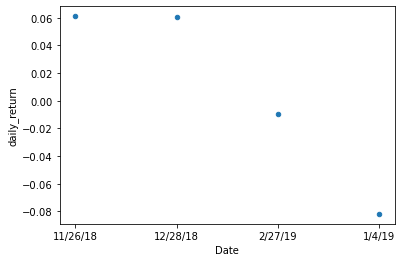

In [40]:
tesla_df.sort_values("daily_return",ascending=False).iloc[:5].plot(x="Date",y="daily_return", kind="scatter")

In [42]:
crypto_df=pd.read_csv("../Desktop/crypto_data.csv")
crypto_df.head()

,cryptocurrency,data_priceUsd,data_date,data_time,timestamp
0,bitcoin,NaN,2017-05-09,1.494288e+12,1.557285e+12
1,bitcoin,1743.723523,2017-05-10,1.494374e+12,NaN
2,bitcoin,1828.678209,2017-05-11,1.494461e+12,NaN
3,bitcoin,1776.443919,2017-05-12,1.494547e+12,NaN
4,bitcoin,1714.964198,2017-05-13,1.494634e+12,NaN


In [43]:
crypto_df.shape

(3556, 5)

In [44]:
crypto_df.dtypes

cryptocurrency     object
data_priceUsd     float64
data_date          object
data_time         float64
timestamp         float64
dtype: object

In [45]:
crypto_df.isnull().any()

cryptocurrency     True
data_priceUsd      True
data_date         False
data_time          True
timestamp          True
dtype: bool

In [65]:
crypto_df["day_name"]= pd.DatetimeIndex(crypto_df["timestamp"]).day_name()
crypto_df

,cryptocurrency,data_priceUsd,data_date,data_time,timestamp,dat_name,day_name
0,bitcoin,NaN,2017-05-09,1.494288e+12,1.557285e+12,Thursday,Thursday
1,bitcoin,1743.723523,2017-05-10,1.494374e+12,NaN,NaN,NaN
2,bitcoin,1828.678209,2017-05-11,1.494461e+12,NaN,NaN,NaN
3,bitcoin,1776.443919,2017-05-12,1.494547e+12,NaN,NaN,NaN
4,bitcoin,1714.964198,2017-05-13,1.494634e+12,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3551,litecoin,76.435295,2019-05-03,1.556842e+12,NaN,NaN,NaN
3552,litecoin,77.011308,2019-05-04,1.556928e+12,NaN,NaN,NaN
3553,litecoin,75.974875,2019-05-05,1.557014e+12,NaN,NaN,NaN
3554,litecoin,73.722948,2019-05-06,1.557101e+12,NaN,NaN,NaN


In [75]:
crypto_df["month_name"]= pd.DatetimeIndex(crypto_df["timestamp"]).month_name()

In [51]:
crypto_df[crypto_df["data_priceUsd"].isna()]

,cryptocurrency,data_priceUsd,data_date,data_time,timestamp
0,bitcoin,NaN,2017-05-09,1.494288e+12,1.557285e+12
7,bitcoin,NaN,2017-05-16,1.494893e+12,NaN
15,bitcoin,NaN,2017-05-24,1.495584e+12,NaN
22,bitcoin,NaN,2017-05-31,1.496189e+12,NaN
135,bitcoin,NaN,2017-09-21,1.505952e+12,NaN
399,bitcoin,NaN,2018-06-13,1.528848e+12,NaN
1472,ethereum,NaN,2017-05-25,1.495670e+12,NaN
1476,ethereum,NaN,2017-05-29,1.496016e+12,NaN
1710,ethereum,NaN,2018-01-18,1.516234e+12,NaN
1816,ethereum,NaN,2018-05-05,1.525478e+12,NaN


In [53]:
#number of unique 
crypto_df["cryptocurrency"].nunique()

5

In [54]:
#what are the uniques
crypto_df["cryptocurrency"].unique()

array(['bitcoin', 'ripple', 'ethereum', nan, 'bitcoin-cash', 'litecoin'],
      dtype=object)

In [58]:
crypto_df.sort_values("cryptocurrency")

,cryptocurrency,data_priceUsd,data_date,data_time,timestamp
0,bitcoin,NaN,2017-05-09,1.494288e+12,1.557285e+12
480,bitcoin,7236.942269,2018-09-02,1.535846e+12,NaN
481,bitcoin,7252.201022,2018-09-03,1.535933e+12,NaN
482,bitcoin,7318.583302,2018-09-04,1.536019e+12,NaN
483,bitcoin,7141.056589,2018-09-05,1.536106e+12,NaN
...,...,...,...,...,...
979,ripple,1.806480,2018-01-15,1.515974e+12,NaN
888,ripple,0.270194,2017-10-16,1.508112e+12,NaN
1817,NaN,792.281931,2018-05-06,1.525565e+12,NaN
1936,NaN,293.925486,2018-09-02,1.535846e+12,NaN


In [57]:
crypto_df.groupby("cryptocurrency").head(10)

,cryptocurrency,data_priceUsd,data_date,data_time,timestamp
0,bitcoin,NaN,2017-05-09,1.494288e+12,1.557285e+12
1,bitcoin,1743.723523,2017-05-10,1.494374e+12,NaN
2,bitcoin,1828.678209,2017-05-11,1.494461e+12,NaN
3,bitcoin,1776.443919,2017-05-12,1.494547e+12,NaN
4,bitcoin,1714.964198,2017-05-13,1.494634e+12,NaN
5,bitcoin,1789.278913,2017-05-14,1.494720e+12,NaN
6,bitcoin,1742.722945,2017-05-15,1.494806e+12,NaN
7,bitcoin,NaN,2017-05-16,1.494893e+12,NaN
8,bitcoin,1802.035054,2017-05-17,1.494979e+12,NaN
9,bitcoin,1840.501678,2017-05-18,1.495066e+12,NaN


In [59]:
crypto_df.groupby("cryptocurrency").count()

,data_priceUsd,data_date,data_time,timestamp
cryptocurrency,,,,
bitcoin,722,728,725,1
bitcoin-cash,639,643,638,1
ethereum,722,726,725,1
litecoin,728,728,728,1
ripple,728,728,728,1


In [61]:
crypto_df.sort_values("cryptocurrency").count()

cryptocurrency    3553
data_priceUsd     3542
data_date         3556
data_time         3547
timestamp            5
dtype: int64

In [60]:
crypto_df.groupby("cryptocurrency").mean()

,data_priceUsd,data_time,timestamp
cryptocurrency,,,
bitcoin,6323.018445,1.525839e+12,1.557285e+12
bitcoin-cash,733.997564,1.529511e+12,1.557287e+12
ethereum,369.037426,1.525739e+12,1.557286e+12
litecoin,85.618264,1.525739e+12,1.557287e+12
ripple,0.475986,1.525739e+12,1.557286e+12


In [68]:
crypto_df.groupby(["cryptocurrency","day_name"]).count()

,,data_priceUsd,data_date,data_time,timestamp,dat_name
cryptocurrency,day_name,,,,,
bitcoin,Thursday,0,1,1,1,1
bitcoin-cash,Thursday,1,1,1,1,1
ethereum,Thursday,1,1,1,1,1
litecoin,Thursday,1,1,1,1,1
ripple,Thursday,1,1,1,1,1


In [73]:
#multy group by with mean value
crypto_df.groupby(["cryptocurrency","day_name"]).mean()

,,data_priceUsd,data_time,timestamp
cryptocurrency,day_name,,,
bitcoin,Thursday,NaN,1.494288e+12,1.557285e+12
bitcoin-cash,Thursday,344.090146,1.501546e+12,1.557287e+12
ethereum,Thursday,84.915618,1.494288e+12,1.557286e+12
litecoin,Thursday,28.020288,1.494288e+12,1.557287e+12
ripple,Thursday,0.166990,1.494288e+12,1.557286e+12


In [74]:
crypto_df.groupby(["cryptocurrency","day_name"])["data_priceUsd"].mean()

cryptocurrency  day_name
bitcoin         Thursday           NaN
bitcoin-cash    Thursday    344.090146
ethereum        Thursday     84.915618
litecoin        Thursday     28.020288
ripple          Thursday      0.166990
Name: data_priceUsd, dtype: float64

In [76]:
crypto_df.dtypes

cryptocurrency     object
data_priceUsd     float64
data_date          object
data_time         float64
timestamp         float64
dat_name           object
day_name           object
month_name         object
dtype: object

cryptocurrency
bitcoin         AxesSubplot(0.125,0.125;0.775x0.755)
bitcoin-cash    AxesSubplot(0.125,0.125;0.775x0.755)
ethereum        AxesSubplot(0.125,0.125;0.775x0.755)
litecoin        AxesSubplot(0.125,0.125;0.775x0.755)
ripple          AxesSubplot(0.125,0.125;0.775x0.755)
Name: data_priceUsd, dtype: object

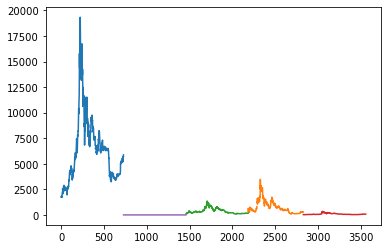

In [82]:
crypto_df.groupby("cryptocurrency")["data_priceUsd"].plot()

cryptocurrency
bitcoin         AxesSubplot(0.125,0.125;0.775x0.755)
bitcoin-cash    AxesSubplot(0.125,0.125;0.775x0.755)
ethereum        AxesSubplot(0.125,0.125;0.775x0.755)
litecoin        AxesSubplot(0.125,0.125;0.775x0.755)
ripple          AxesSubplot(0.125,0.125;0.775x0.755)
Name: data_priceUsd, dtype: object

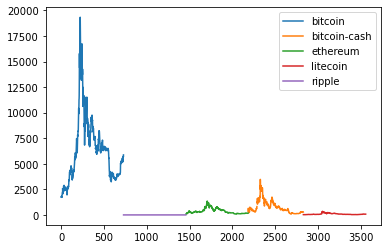

In [83]:
crypto_df.groupby("cryptocurrency")["data_priceUsd"].plot(legend=True)

In [84]:
crypto_df.groupby("cryptocurrency")["data_priceUsd"].min()

cryptocurrency
bitcoin         6323.018445
bitcoin-cash     733.997564
ethereum         369.037426
litecoin          85.618264
ripple             0.475986
Name: data_priceUsd, dtype: float64

In [85]:
crypto_df.groupby("cryptocurrency")["data_priceUsd"].max()

cryptocurrency
bitcoin         19339.922660
bitcoin-cash     3476.844119
ethereum         1346.037491
litecoin          352.713468
ripple              2.999459
Name: data_priceUsd, dtype: float64

In [86]:
crypto_df.groupby("cryptocurrency")["data_priceUsd"].mean()

cryptocurrency
bitcoin         6323.018445
bitcoin-cash     733.997564
ethereum         369.037426
litecoin          85.618264
ripple             0.475986
Name: data_priceUsd, dtype: float64

In [87]:
twtr_df=pd.read_csv("../Desktop/twtr_google_finance.csv")
twtr_df.head()

,Date,Close
0,4/9/19,35.139999
1,4/10/19,34.750000
2,4/11/19,34.580002
3,4/12/19,34.369999
4,4/15/19,34.709999


In [88]:
twtr_df.shape

(22, 2)

In [106]:
#date is notmaly object so multi version od date can be replaced
twtr_df.dtypes

Date          datetime64[ns]
Close                float64
day                    int64
month                  int64
year                   int64
month_name            object
day_name              object
dtype: object

In [107]:
twtr_df.isnull().any()

Date          False
Close         False
day           False
month         False
year          False
month_name    False
day_name      False
dtype: bool

In [108]:
twtr_df["Date"]=pd.to_datetime(twtr_df["Date"])
twtr_df.dtypes

Date          datetime64[ns]
Close                float64
day                    int64
month                  int64
year                   int64
month_name            object
day_name              object
dtype: object

In [92]:
twtr_df["day"]=pd.DatetimeIndex(twtr_df["Date"]).day
twtr_df["month"]=pd.DatetimeIndex(twtr_df["Date"]).month
twtr_df["year"]=pd.DatetimeIndex(twtr_df["Date"]).year
twtr_df["month_name"]=pd.DatetimeIndex(twtr_df["Date"]).month_name()
twtr_df["day_name"]=pd.DatetimeIndex(twtr_df["Date"]).day_name()

In [113]:
twtr_df["hour"]=pd.DatetimeIndex(twtr_df["Date"]).hour

In [114]:
twtr_df.head()

,Date,Close,day,month,year,month_name,day_name,hour
0,2019-04-09,35.139999,9,4,2019,April,Tuesday,0
1,2019-04-10,34.750000,10,4,2019,April,Wednesday,0
2,2019-04-11,34.580002,11,4,2019,April,Thursday,0
3,2019-04-12,34.369999,12,4,2019,April,Friday,0
4,2019-04-15,34.709999,15,4,2019,April,Monday,0


In [94]:
twtr_df.shape

(22, 7)

In [103]:
#head() is not gruping by day for some reason
twtr_df.groupby("month").head()

,Date,Close,day,month,year,month_name,day_name
0,2019-04-09,35.139999,9,4,2019,April,Tuesday
1,2019-04-10,34.750000,10,4,2019,April,Wednesday
2,2019-04-11,34.580002,11,4,2019,April,Thursday
3,2019-04-12,34.369999,12,4,2019,April,Friday
4,2019-04-15,34.709999,15,4,2019,April,Monday
15,2019-05-01,39.290001,1,5,2019,May,Wednesday
16,2019-05-02,39.950001,2,5,2019,May,Thursday
17,2019-05-03,40.799999,3,5,2019,May,Friday
18,2019-05-06,40.230000,6,5,2019,May,Monday
19,2019-05-07,38.619999,7,5,2019,May,Tuesday


In [101]:
#mean of day of month
twtr_df.groupby(["day_name","month_name"])["Close"].mean()

day_name   month_name
Friday     April         36.519998
           May           40.799999
Monday     April         36.293332
           May           40.230000
Thursday   April         35.820001
           May           39.370001
Tuesday    April         37.320000
           May           38.619999
Wednesday  April         36.173334
           May           38.935001
Name: Close, dtype: float64

In [109]:
twtr_df.groupby(["year","month_name"])["Close"].mean()

year  month_name
2019  April         36.478666
      May           39.465715
Name: Close, dtype: float64

In [112]:
# to see all type of unique differnt datas 
#twtr_df["month_name"]= twtr_df["month_name"].str.replace("no value", "NaN")
twtr_df["month_name"].unique()

array(['April', 'May'], dtype=object)

In [117]:
twtr_df[twtr_df["Date"] == "2019-04-09"]

,Date,Close,day,month,year,month_name,day_name,hour
0,2019-04-09,35.139999,9,4,2019,April,Tuesday,0


In [118]:
twtr_df[twtr_df["month_name"] == "May"]

,Date,Close,day,month,year,month_name,day_name,hour
15,2019-05-01,39.290001,1,5,2019,May,Wednesday,0
16,2019-05-02,39.950001,2,5,2019,May,Thursday,0
17,2019-05-03,40.799999,3,5,2019,May,Friday,0
18,2019-05-06,40.230000,6,5,2019,May,Monday,0
19,2019-05-07,38.619999,7,5,2019,May,Tuesday,0
20,2019-05-08,38.580002,8,5,2019,May,Wednesday,0
21,2019-05-09,38.790001,9,5,2019,May,Thursday,0


In [179]:
twtr_df[ (( twtr_df["month_name"] == "May" ) & ( twtr_df["day_name"] == "Wednesday" )) & (twtr_df["day"] == 1) ]

,Date,Close,day,month,year,month_name,day_name,hour
15,2019-05-01,39.290001,1,5,2019,May,Wednesday,0


In [165]:
goog_df=pd.read_csv("../Desktop/goog_google_finance.csv")
goog_df.head()

,Date,Close
0,5/13/19,1132.03
1,5/10/19,1164.27
2,5/9/19,1162.38
3,5/8/19,1166.27
4,5/7/19,1174.10


In [166]:
goog_df.shape

(64, 2)

In [167]:
goog_df.dtypes

Date      object
Close    float64
dtype: object

In [168]:
goog_df.isnull().any()

Date     False
Close    False
dtype: bool

In [169]:
goog_df["Date"].unique()

array(['5/13/19', '5/10/19', '5/9/19', '5/8/19', '5/7/19', '5/6/19',
       '5/3/19', '5/2/19', '5/1/19', '4/30/19', '4/29/19', '4/26/19',
       '4/25/19', '4/24/19', '4/23/19', '4/22/19', '4/18/19', '4/17/19',
       '4/16/19', '4/15/19', '4/12/19', '4/11/19', '4/10/19', '4/9/19',
       '4/8/19', '4/5/19', '4/4/19', '4/3/19', '4/2/19', '4/1/19',
       '3/29/19', '3/28/19', '3/27/19', '3/26/19', '3/25/19', '3/22/19',
       '3/21/19', '3/20/19', '3/19/19', '3/18/19', '3/15/19', '3/14/19',
       '3/13/19', '3/12/19', '3/11/19', '3/8/19', '3/7/19', '3/6/19',
       '3/5/19', '3/4/19', '3/1/19', '2/28/19', '2/27/19', '2/26/19',
       '2/25/19', '2/22/19', '2/21/19', '2/20/19', '2/19/19', '2/15/19',
       '2/14/19', '2/13/19', '2/12/19', '2/11/19'], dtype=object)

In [170]:
goog_df["Date"]=pd.to_datetime(goog_df["Date"])
goog_df.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [171]:
goog_df["Date"].unique()

array(['2019-05-13T00:00:00.000000000', '2019-05-10T00:00:00.000000000',
       '2019-05-09T00:00:00.000000000', '2019-05-08T00:00:00.000000000',
       '2019-05-07T00:00:00.000000000', '2019-05-06T00:00:00.000000000',
       '2019-05-03T00:00:00.000000000', '2019-05-02T00:00:00.000000000',
       '2019-05-01T00:00:00.000000000', '2019-04-30T00:00:00.000000000',
       '2019-04-29T00:00:00.000000000', '2019-04-26T00:00:00.000000000',
       '2019-04-25T00:00:00.000000000', '2019-04-24T00:00:00.000000000',
       '2019-04-23T00:00:00.000000000', '2019-04-22T00:00:00.000000000',
       '2019-04-18T00:00:00.000000000', '2019-04-17T00:00:00.000000000',
       '2019-04-16T00:00:00.000000000', '2019-04-15T00:00:00.000000000',
       '2019-04-12T00:00:00.000000000', '2019-04-11T00:00:00.000000000',
       '2019-04-10T00:00:00.000000000', '2019-04-09T00:00:00.000000000',
       '2019-04-08T00:00:00.000000000', '2019-04-05T00:00:00.000000000',
       '2019-04-04T00:00:00.000000000', '2019-04-03

In [172]:
goog_df["hour"]=pd.DatetimeIndex(goog_df["Date"]).hour
goog_df["day"]=pd.DatetimeIndex(goog_df["Date"]).day
goog_df["month"]=pd.DatetimeIndex(goog_df["Date"]).month
goog_df["year"]=pd.DatetimeIndex(goog_df["Date"]).year
goog_df["month_name"]=pd.DatetimeIndex(goog_df["Date"]).month_name()
goog_df["day_name"]=pd.DatetimeIndex(goog_df["Date"]).day_name()

In [173]:
goog_df.head()

,Date,Close,hour,day,month,year,month_name,day_name
0,2019-05-13,1132.03,0,13,5,2019,May,Monday
1,2019-05-10,1164.27,0,10,5,2019,May,Friday
2,2019-05-09,1162.38,0,9,5,2019,May,Thursday
3,2019-05-08,1166.27,0,8,5,2019,May,Wednesday
4,2019-05-07,1174.10,0,7,5,2019,May,Tuesday


In [174]:
goog_df.groupby("month").head()

,Date,Close,hour,day,month,year,month_name,day_name
0,2019-05-13,1132.03,0,13,5,2019,May,Monday
1,2019-05-10,1164.27,0,10,5,2019,May,Friday
2,2019-05-09,1162.38,0,9,5,2019,May,Thursday
3,2019-05-08,1166.27,0,8,5,2019,May,Wednesday
4,2019-05-07,1174.10,0,7,5,2019,May,Tuesday
9,2019-04-30,1188.48,0,30,4,2019,April,Tuesday
10,2019-04-29,1287.58,0,29,4,2019,April,Monday
11,2019-04-26,1272.18,0,26,4,2019,April,Friday
12,2019-04-25,1263.45,0,25,4,2019,April,Thursday
13,2019-04-24,1256.00,0,24,4,2019,April,Wednesday


In [175]:
goog_df.groupby(["day_name","month_name"])["Close"].mean()

day_name   month_name
Friday     April         1232.400000
           February      1112.010000
           March         1169.316000
           May           1174.835000
Monday     April         1231.158000
           February      1102.205000
           March         1175.205000
           May           1160.710000
Thursday   April         1229.860000
           February      1112.853333
           March         1182.220000
           May           1162.495000
Tuesday    April         1215.580000
           February      1118.353333
           March         1184.675000
           May           1174.100000
Wednesday  April         1225.105000
           February      1116.670000
           March         1187.042500
           May           1167.175000
Name: Close, dtype: float64

In [176]:
goog_df["month_name"].unique()

array(['May', 'April', 'March', 'February'], dtype=object)

In [177]:
goog_df["Date"].unique()

array(['2019-05-13T00:00:00.000000000', '2019-05-10T00:00:00.000000000',
       '2019-05-09T00:00:00.000000000', '2019-05-08T00:00:00.000000000',
       '2019-05-07T00:00:00.000000000', '2019-05-06T00:00:00.000000000',
       '2019-05-03T00:00:00.000000000', '2019-05-02T00:00:00.000000000',
       '2019-05-01T00:00:00.000000000', '2019-04-30T00:00:00.000000000',
       '2019-04-29T00:00:00.000000000', '2019-04-26T00:00:00.000000000',
       '2019-04-25T00:00:00.000000000', '2019-04-24T00:00:00.000000000',
       '2019-04-23T00:00:00.000000000', '2019-04-22T00:00:00.000000000',
       '2019-04-18T00:00:00.000000000', '2019-04-17T00:00:00.000000000',
       '2019-04-16T00:00:00.000000000', '2019-04-15T00:00:00.000000000',
       '2019-04-12T00:00:00.000000000', '2019-04-11T00:00:00.000000000',
       '2019-04-10T00:00:00.000000000', '2019-04-09T00:00:00.000000000',
       '2019-04-08T00:00:00.000000000', '2019-04-05T00:00:00.000000000',
       '2019-04-04T00:00:00.000000000', '2019-04-03

In [178]:
goog_df[(goog_df["month_name"] == "May") & (goog_df["year"] == 2019)]

,Date,Close,hour,day,month,year,month_name,day_name
0,2019-05-13,1132.03,0,13,5,2019,May,Monday
1,2019-05-10,1164.27,0,10,5,2019,May,Friday
2,2019-05-09,1162.38,0,9,5,2019,May,Thursday
3,2019-05-08,1166.27,0,8,5,2019,May,Wednesday
4,2019-05-07,1174.10,0,7,5,2019,May,Tuesday
5,2019-05-06,1189.39,0,6,5,2019,May,Monday
6,2019-05-03,1185.40,0,3,5,2019,May,Friday
7,2019-05-02,1162.61,0,2,5,2019,May,Thursday
8,2019-05-01,1168.08,0,1,5,2019,May,Wednesday


In [189]:
customer_info_df = pd.read_csv("../Desktop/customer_info.csv")
france_df = pd.read_csv("../Desktop/france_products.csv")
netherlands_df = pd.read_csv("../Desktop/netherlands_products.csv")
products_df = pd.read_csv("../Desktop/products.csv")
uk_products_df= pd.read_csv("../Desktop/uk_products.csv")

In [190]:
france_df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,10002,INFLATABLE POLITICAL GLOBE,48,12/1/2010 8:45,0.85,12583,France
1,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,24,12/1/2010 8:45,1.25,12583,France


In [191]:
uk_products_df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,539490,22720,SET OF 3 CAKE TINS PANTRY DESIGN,6,12/20/2010 10:00,4.95,17069,United Kingdom
1,539490,22721,SET OF 3 CAKE TINS SKETCHBOOK,3,12/20/2010 10:00,4.95,17069,United Kingdom


In [192]:
netherlands_df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,539491,21981,PACK OF 12 WOODLAND TISSUES,12,12/20/2010 10:09,0.29,14646,Netherlands
1,539491,21986,PACK OF 12 PINK POLKADOT TISSUES,12,12/20/2010 10:09,0.29,14646,Netherlands


In [193]:
uk_products_df.columns == france_df.columns

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [194]:
uk_france_nether_df =pd.concat([france_df,uk_products_df,netherlands_df],join="inner")
uk_france_nether_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,10002,INFLATABLE POLITICAL GLOBE,48,12/1/2010 8:45,0.85,12583,France
1,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,24,12/1/2010 8:45,1.25,12583,France
2,536370,21035,SET/2 RED RETROSPOT TEA TOWELS,18,12/1/2010 8:45,2.95,12583,France
3,536370,22326,ROUND SNACK BOXES SET OF4 WOODLAND,24,12/1/2010 8:45,2.95,12583,France
4,536370,22629,SPACEBOY LUNCH BOX,24,12/1/2010 8:45,1.95,12583,France


In [195]:
uk_products_df["Country"].unique()

array(['United Kingdom'], dtype=object)

In [196]:
uk_france_nether_df["Country"].unique()

array(['France', 'United Kingdom', 'Netherlands'], dtype=object)

In [199]:
customer_info_df.head()

,CustomerID,FirstName,LastName,Address,City,Postal,Country,JoinDate
0,12583,Christine,Lagarde,26 rue des Nations Unies,SAINT-BENOÎT,97470,France,2012-09-12
1,17069,John,Grayken,73 Red Lane,Evershot,DT2 5JB,UK,2010-04-24
2,14646,Frits,Goldschmeding,Nassaupark 84,Bussum,1405 HP,Holland,2017-01-19


In [198]:
products_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,539491,21981,PACK OF 12 WOODLAND TISSUES,12,12/20/2010 10:09,0.29,14646,Netherlands
1,539490,22665,RECIPE BOX BLUE SKETCHBOOK DESIGN,12,12/20/2010 10:00,2.95,17069,United Kingdom
2,540455,22726,ALARM CLOCK BAKELIKE GREEN,16,1/7/2011 12:07,3.75,12583,France


In [197]:
customer_info_df.columns == products_df.columns

array([False, False, False, False, False, False, False, False])

In [203]:
#inner join only without any match
customer_product_df = pd.concat([customer_info_df,products_df],axis=1,join="inner")
customer_product_df.head()

,CustomerID,FirstName,LastName,Address,City,Postal,Country,JoinDate,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,12583,Christine,Lagarde,26 rue des Nations Unies,SAINT-BENOÎT,97470,France,2012-09-12,539491,21981,PACK OF 12 WOODLAND TISSUES,12,12/20/2010 10:09,0.29,14646,Netherlands
1,17069,John,Grayken,73 Red Lane,Evershot,DT2 5JB,UK,2010-04-24,539490,22665,RECIPE BOX BLUE SKETCHBOOK DESIGN,12,12/20/2010 10:00,2.95,17069,United Kingdom
2,14646,Frits,Goldschmeding,Nassaupark 84,Bussum,1405 HP,Holland,2017-01-19,540455,22726,ALARM CLOCK BAKELIKE GREEN,16,1/7/2011 12:07,3.75,12583,France


In [204]:
#inner join iwth where column
customer_merge_df = pd.merge(customer_info_df,products_df,how="inner",on="CustomerID")
customer_merge_df.head()

,CustomerID,FirstName,LastName,Address,City,Postal,Country_x,JoinDate,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country_y
0,12583,Christine,Lagarde,26 rue des Nations Unies,SAINT-BENOÎT,97470,France,2012-09-12,540455,22726,ALARM CLOCK BAKELIKE GREEN,16,1/7/2011 12:07,3.75,France
1,17069,John,Grayken,73 Red Lane,Evershot,DT2 5JB,UK,2010-04-24,539490,22665,RECIPE BOX BLUE SKETCHBOOK DESIGN,12,12/20/2010 10:00,2.95,United Kingdom
2,14646,Frits,Goldschmeding,Nassaupark 84,Bussum,1405 HP,Holland,2017-01-19,539491,21981,PACK OF 12 WOODLAND TISSUES,12,12/20/2010 10:09,0.29,Netherlands


In [205]:
fin_leader_df = pd.read_csv("../Desktop/fin_leaders_america.csv")
fin_leader_memebrs_df = pd.read_csv("../Desktop/fin_leaders_members.csv")
investers__leader_df = pd.read_csv("../Desktop/invstrs_leadership.csv")
invensters_leader_member_df = pd.read_csv("../Desktop/invstrs_leadership_members.csv")

In [206]:
fin_leader_df.head(2)

,MemberName,DuesOwed,DuesPaid
0,Warren Buffet,0,2500
1,Janet Yellen,100,2400


In [213]:
fin_leader_memebrs_df.head(2)

,MemberName,MembershipStatus
0,Warren Buffet,Good Standing
1,Janet Yellen,Good Standing


In [214]:
investers__leader_df.head(2)

,MemberName,DuesOwed,DuesPaid
0,Warren Buffet,0,2500
1,Janet Yellen,100,2400


In [215]:
invensters_leader_member_df.head(2)

,MemberName,MembershipStatus
0,Warren Buffet,Good Standing
1,Janet Yellen,Good Standing


In [219]:
pd.concat([fin_leader_memebrs_df,invensters_leader_member_df],join="inner")

,MemberName,MembershipStatus
0,Warren Buffet,Good Standing
1,Janet Yellen,Good Standing
2,Abigail Johnson,Good Standing
3,Larry Fink,Delinquent
0,Warren Buffet,Good Standing
1,Janet Yellen,Good Standing
2,Abigail Johnson,Good Standing
3,Larry Fink,Delinquent
4,Mario Draghi,Delinquent
5,Michael Bloomberg,Delinquent


In [221]:
pd.concat([fin_leader_df,investers__leader_df],join="inner")

,MemberName,DuesOwed,DuesPaid
0,Warren Buffet,0,2500
1,Janet Yellen,100,2400
2,Abigail Johnson,0,2500
3,Larry Fink,2500,0
0,Warren Buffet,0,2500
1,Janet Yellen,100,2400
2,Abigail Johnson,0,2500
3,Larry Fink,2500,0
4,Mario Draghi,2500,0
5,Michael Bloomberg,2500,0


In [223]:
pd.merge(fin_leader_df,fin_leader_memebrs_df,how="inner",on="MemberName")

,MemberName,DuesOwed,DuesPaid,MembershipStatus
0,Warren Buffet,0,2500,Good Standing
1,Janet Yellen,100,2400,Good Standing
2,Abigail Johnson,0,2500,Good Standing
3,Larry Fink,2500,0,Delinquent


In [226]:
fin_invest = pd.merge(investers__leader_df,invensters_leader_member_df,how="inner",on="MemberName")
fin_invest.head()

,MemberName,DuesOwed,DuesPaid,MembershipStatus
0,Warren Buffet,0,2500,Good Standing
1,Janet Yellen,100,2400,Good Standing
2,Abigail Johnson,0,2500,Good Standing
3,Larry Fink,2500,0,Delinquent
4,Mario Draghi,2500,0,Delinquent


In [227]:
tscv2018 = pd.read_csv("../Desktop/tech_stocks_closing_value_2018.csv")
tscv2018.headd()

,Date,AAPL,MSFT,GOOG,FB,AMZN
0,2018-01-02,168.339050,84.128128,1065.000000,181.419998,1189.010010
1,2018-01-03,168.309738,84.519646,1082.479980,184.669998,1204.199951
2,2018-01-04,169.091522,85.263542,1086.400024,184.330002,1209.589966
3,2018-01-05,171.016678,86.320648,1102.229980,186.850006,1229.140015
4,2018-01-08,170.381485,86.408737,1106.939941,188.279999,1246.869995


In [229]:
tscv2018.dtypes

Date     object
AAPL    float64
MSFT    float64
GOOG    float64
FB      float64
AMZN    float64
dtype: object

In [232]:
tscv2018_2 = tscv2018.loc[:,tscv2018.columns != "Date"]
tscv2018_2.head()

,AAPL,MSFT,GOOG,FB,AMZN
0,168.339050,84.128128,1065.000000,181.419998,1189.010010
1,168.309738,84.519646,1082.479980,184.669998,1204.199951
2,169.091522,85.263542,1086.400024,184.330002,1209.589966
3,171.016678,86.320648,1102.229980,186.850006,1229.140015
4,170.381485,86.408737,1106.939941,188.279999,1246.869995


In [240]:
# standard deviation on dollars 
tscv2018_2.std()

AAPL     20.712947
MSFT      8.231386
GOOG     67.315548
FB       19.977452
AMZN    197.275076
dtype: float64

In [234]:
# for getting the daily return standard deviation get the percent change then call the standard deviation
# in percentage
tscv2018_2_daily_returns = tscv2018_2.pct_change()
tscv2018_2_daily_returns.head()

,AAPL,MSFT,GOOG,FB,AMZN
0,NaN,NaN,NaN,NaN,NaN
1,-0.000174,0.004654,0.016413,0.017914,0.012775
2,0.004645,0.008801,0.003621,-0.001841,0.004476
3,0.011385,0.012398,0.014571,0.013671,0.016163
4,-0.003714,0.001020,0.004273,0.007653,0.014425


In [237]:
tscv2018_2_daily_returns.std().sort_values() #sort it

GOOG    0.017724
MSFT    0.017839
AAPL    0.018106
AMZN    0.022768
FB      0.023949
dtype: float64

In [238]:
import numpy as np

In [239]:
#annual 
tscv2018_2_daily_returns.std() * np.sqrt(252)

AAPL    0.287428
MSFT    0.283180
GOOG    0.281354
FB      0.380172
AMZN    0.361434
dtype: float64

In [241]:
risk_free_rate=pd.read_csv("../Desktop/risk_free_rate.csv")
tech_stocks_2018_a=pd.read_csv("../Desktop/tech_stocks_2018_a.csv")   # portfolio a
tech_stocks_2018_b=pd.read_csv("../Desktop/tech_stocks_2018_b.csv")   # portfolio b

In [242]:
risk_free_rate.head(2)

,Date,rf_rate
0,1954-01-04,0.000148
1,1954-01-05,0.000142


In [243]:
tech_stocks_2018_a.head(2)

,Date,AAPL,MSFT,GOOG,FB,AMZN
0,2019/08/23,202.64,133.39,1151.29,177.75,1749.62
1,2019/08/22,212.46,137.78,1189.53,182.04,1805.60


In [245]:
tech_stocks_2018_b.head(2)

,Date,SNE,AMD,TWTR,IBM,MU
0,2019/08/23,202.64,133.39,1151.29,177.75,42.96
1,2019/08/22,54.77,31.90,42.18,134.32,44.78


In [246]:
risk_free_rate_2 = risk_free_rate.loc[:,risk_free_rate.columns != 'Date']

In [247]:
tech_stocks_2018_a_2 = tech_stocks_2018_a.loc[:,tech_stocks_2018_a.columns != 'Date']

In [248]:
tech_stocks_2018_b_2 = tech_stocks_2018_b.loc[:,tech_stocks_2018_b.columns != 'Date']

In [249]:
portfolio_a = tech_stocks_2018_a_2.pct_change()
portfolio_a.head(3)

,AAPL,MSFT,GOOG,FB,AMZN
0,NaN,NaN,NaN,NaN,NaN
1,0.048460,0.032911,0.033215,0.024135,0.031996
2,0.000847,0.007331,0.001446,0.008295,0.009936


In [250]:
portfolio_b = tech_stocks_2018_b_2.pct_change()
portfolio_b.head(3)

,SNE,AMD,TWTR,IBM,MU
0,NaN,NaN,NaN,NaN,NaN
1,-0.729718,-0.760852,-0.963363,-0.244332,0.042365
2,0.034325,-0.006270,0.014699,-0.000521,-0.013622


In [251]:
risk_free_rate_2.shape

(16722, 1)

In [253]:
portfolio_a.shape

(253, 5)

In [254]:
portfolio_b.shape

(253, 5)

In [256]:
allportfolio = pd.concat([risk_free_rate_2,portfolio_a,portfolio_b],axis =1, join ="inner")
allportfolio.head()

,rf_rate,AAPL,MSFT,GOOG,FB,AMZN,SNE,AMD,TWTR,IBM,MU
0,0.000148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.000142,0.048460,0.032911,0.033215,0.024135,0.031996,-0.729718,-0.760852,-0.963363,-0.244332,0.042365
2,0.000142,0.000847,0.007331,0.001446,0.008295,0.009936,0.034325,-0.006270,0.014699,-0.000521,-0.013622
3,0.000146,-0.010722,-0.011024,-0.007186,0.001417,-0.012152,-0.017476,-0.030915,-0.011916,-0.009311,0.001358
4,0.000146,-0.000048,0.008378,0.013326,0.012839,0.008183,0.001078,0.024740,-0.013951,0.015338,0.017635


In [274]:
( allportfolio.mean() - allportfolio["rf_rate"].mean() ) / allportfolio.std() # Daily

rf_rate    0.000000
AAPL       0.016511
MSFT      -0.049228
GOOG       0.013757
FB         0.001057
AMZN       0.021537
SNE       -0.056249
AMD       -0.059198
TWTR      -0.064729
IBM       -0.029399
MU         0.032139
dtype: float64

In [275]:
sharp_ration_annual = ( allportfolio.mean() - allportfolio["rf_rate"].mean() ) / allportfolio.std()*np.sqrt(252) # Annual
sharp_ration_annual.head()

rf_rate    0.000000
AAPL       0.262099
MSFT      -0.781469
GOOG       0.218390
FB         0.016786
dtype: float64

<AxesSubplot:title={'center':'Sharp Ratio'}>

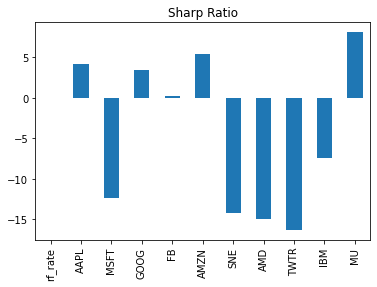

In [272]:
sharp_ration_annual.plot(kind="bar",title="Sharp Ratio")

In [273]:
harold_df=pd.read_csv("../Desktop/harold_portfolio.csv")
my_portfolio=pd.read_csv("../Desktop/my_portfolio.csv") 